## Integral Sum

In [1]:
//load ImageJ
%classpath config resolver scijava.public https://maven.scijava.org/content/groups/public
%classpath add mvn net.imagej imagej 2.0.0-rc-67

//create ImageJ object
ij = new net.imagej.ImageJ()

Added new repo: scijava.public


net.imagej.ImageJ@3baf5137

This `Op` calculates the sum of a subregion of an `Img` using a [Summed-area table](https://en.wikipedia.org/wiki/Summed-area_table), a procedure that . This notebook will differ from the flow of most of the other `stats` `Op`s since this `Op` is a little more complicated; let's call `help()` to see how it is called:

In [2]:
ij.op().help('integralSum')

Available operations:
	(DoubleType out?) =
	net.imagej.ops.stats.IntegralSum(
		DoubleType out?,
		RectangleNeighborhood in)

As you can see the `Op` takes a [`RectangleNeighborhood`] (INSERT LINK) as input. This is because the `Op` calculated the sum over a given subregion of the `Img`, something that a `RectangleNeighborhood` is designed to provide. Let's start by creating an `Img`:

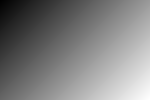

In [3]:
ramp = ij.op().run("create.img", [150, 100])
formula = "p[0] + p[1]"
ij.op().image().equation(ramp, formula)

ij.notebook().display(ramp)

Now that we have an `Img` we can create a `RectangleNeighborhood` (using a `RectangleNeighborhoodFactory`) to pass through to the `Op`:

In [4]:
import net.imglib2.algorithm.neighborhood.RectangleNeighborhood

//our current position in the neighborhood. This is not really important in this use case 
//since all we care about is the region as a whole (since we are summing each pixel), 
//however in other applications it can be useful.
position = [5, 5] as long[]

//The top left corner of the neighborhood
min = [0, 0] as long[]

//The bottom right corner of the neighborhood
max = [10, 10] as long[]

//An Interval object that defines the span of the image. This is, again, 
//not really important for our use case, ut we can pass through our ramp image since
//all Imgs are Intervals
span = ramp

//A RandomAccess that allows us to access all of the data values of our Img
randomAccess = ramp.randomAccess()

neighborhood = RectangleNeighborhood.factory().create(position, min, max, span, randomAccess)

net.imglib2.algorithm.neighborhood.RectangleNeighborhood@13a113d5

Now that we have our `RectangleNeighborhood` we can pass it through to `integralSum()`:

In [5]:
import net.imglib2.type.numeric.real.DoubleType

output = new DoubleType()

ij.op().stats().integralSum(output, neighborhood)

output

0.0